
#Sarcasm Detection on Airline Reviews - Data Preprocessing

This notebook demonstrates the steps for preprocessing a dataset for sarcasm detection in Airline Reviews using deep learning. The preprocessing steps include loading the dataset, cleaning the data, and preparing the data for model training.

#Dataset Overview
We are using a dataset of Airline Reviews which contains the following columns:

`Review`: The text of the YouTube comment.

`sarcasm`: The target label indicating whether the comment is sarcastic (1) or not (0).


Additional features related to airline information.

Let's load the dataset and take a look at its structure.

In [1]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
dataset_path = '/content/drive/My Drive/Airline_Reviews_Labeled.csv'
  # Update with your dataset path
data = pd.read_csv(dataset_path)


class_distribution = data['sarcasm'].value_counts()
print(class_distribution)

minority_class_percentage = (class_distribution.min() / len(data)) * 100
print(minority_class_percentage)

majority_class_percentage = (class_distribution.max() / len(data)) * 100
print(majority_class_percentage)

Mounted at /content/drive
sarcasm
1    16548
0     6623
Name: count, dtype: int64
28.58314272150533
71.41685727849467


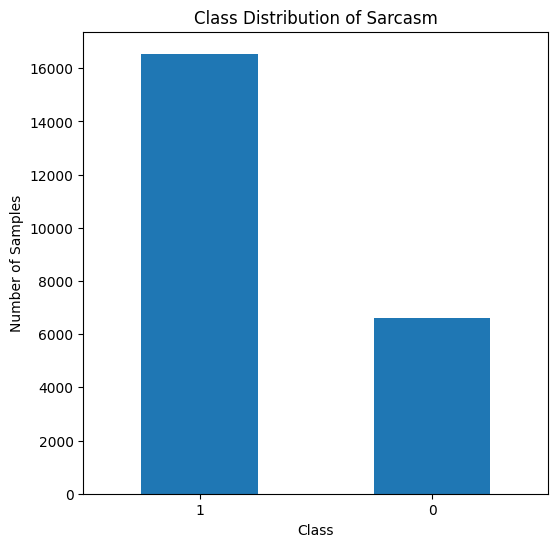

In [2]:
import matplotlib.pyplot as plt
# Plotting the class distribution
plt.figure(figsize=(6, 6))
class_distribution.plot(kind='bar')
plt.title('Class Distribution of Sarcasm')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.show()

In [3]:

# List of columns to drop
columns_to_drop = [
    'Unnamed: 0','Airline Name','Overall_Rating','Review_Title','Review Date',
    'Verified','Aircraft','Type Of Traveller','Route', 'Seat Type', 'Date Flown',
    'Seat Comfort','Cabin Staff Service', 'Food & Beverages',
    'Ground Service', 'Inflight Entertainment',
    'Wifi & Connectivity', 'Value For Money','Recommended',
]

# Drop columns
data = data.drop(columns=columns_to_drop, errors='ignore')


In [4]:
# Randomly sample 8000 records
sampled_data = data.sample(n=20000, random_state=42)



##Spliting into train and test data

In [5]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(sampled_data['Review'], sampled_data['sarcasm'], test_size=0.2, random_state=42)


In [6]:
# Convert to DataFrame for preprocessing
train_data = pd.DataFrame({'text': X_train, 'label': y_train})

In [7]:
# Convert to DataFrame for preprocessing
test_data = pd.DataFrame({'text': X_test, 'label': y_test})

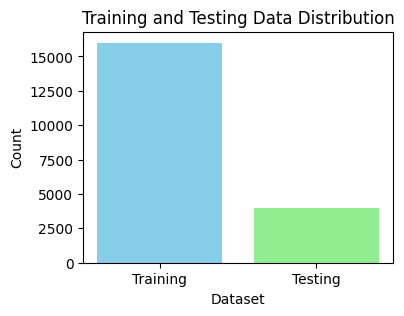

In [8]:
# Get the sizes of training and testing sets
train_size = len(X_train)
test_size = len(X_test)

# Create a DataFrame for visualization
data_sizes = pd.DataFrame({
    'Dataset': ['Training', 'Testing'],
    'Count': [train_size, test_size]
})

# Plot the distribution
plt.figure(figsize=(4, 3))
plt.bar(data_sizes['Dataset'], data_sizes['Count'], color=['skyblue', 'lightgreen'])
plt.title('Training and Testing Data Distribution')
plt.xlabel('Dataset')
plt.ylabel('Count')
plt.show()

Total number of training records: 16000
Total number of testing records: 4000

Training Data Distribution:
label
1    11384
0     4616
Name: count, dtype: int64

Testing Data Distribution:
label
1    2900
0    1100
Name: count, dtype: int64


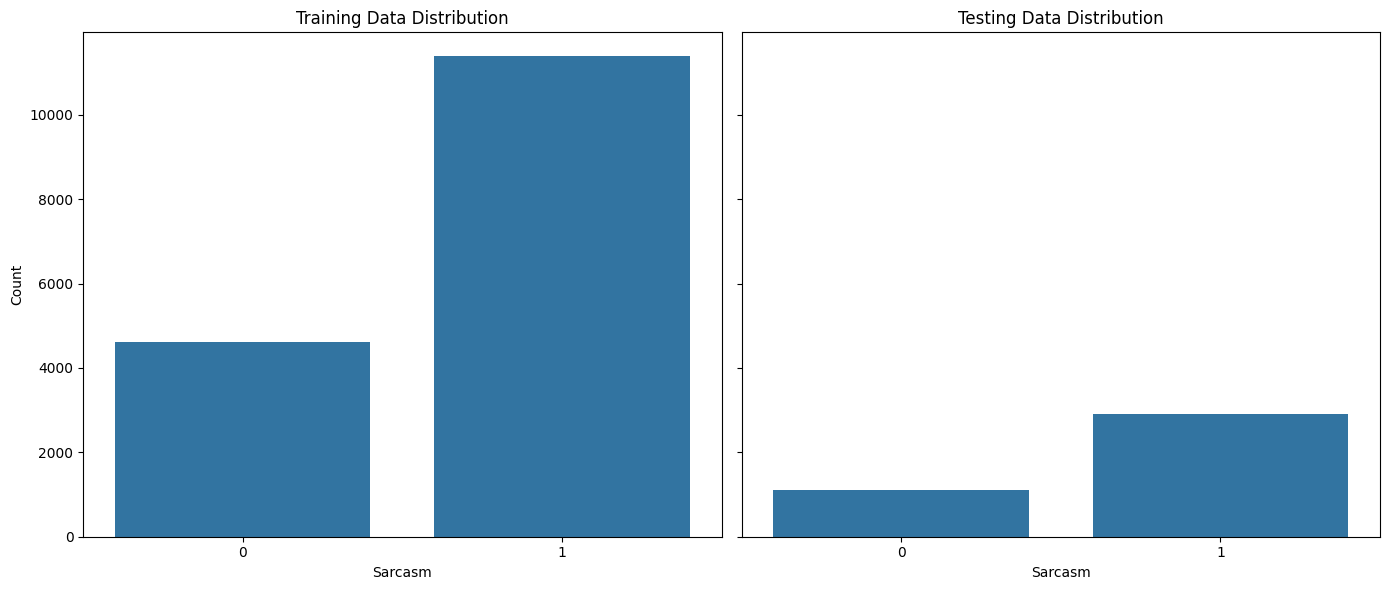

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Print the total number of records in training and testing datasets
print(f"Total number of training records: {len(train_data)}")
print(f"Total number of testing records: {len(test_data)}")

# Print the distribution of the 'sarcasm' column in the training and testing data
train_counts = train_data['label'].value_counts()
test_counts = test_data['label'].value_counts()

print("\nTraining Data Distribution:")
print(train_counts)
print("\nTesting Data Distribution:")
print(test_counts)

# Plot the distribution of the 'sarcasm' column in the training and testing data
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.countplot(ax=axes[0], x=train_data['label'])
axes[0].set_title('Training Data Distribution')
axes[0].set_xlabel('Sarcasm')
axes[0].set_ylabel('Count')

sns.countplot(ax=axes[1], x=test_data['label'])
axes[1].set_title('Testing Data Distribution')
axes[1].set_xlabel('Sarcasm')

plt.tight_layout()
plt.show()


# Data Visualization

In [10]:
# Describe the dataset
print(train_data.describe())

              label
count  16000.000000
mean       0.711500
std        0.453079
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000


In [11]:
# Shape of the dataset
print(train_data.shape)

(16000, 2)


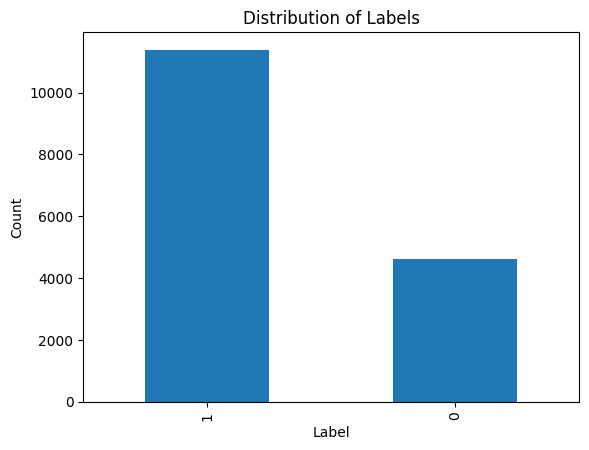

In [12]:
import matplotlib.pyplot as plt
# Distribution of labels
train_data['label'].value_counts().plot(kind='bar')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


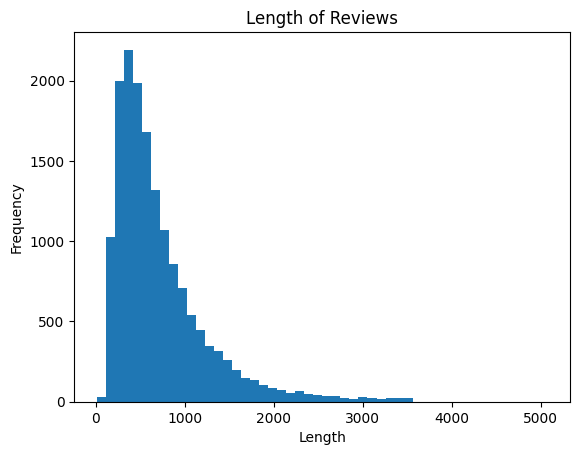

In [13]:
import matplotlib.pyplot as plt

# Length of reviews
train_data['review_length'] = train_data['text'].apply(len)
plt.hist(train_data['review_length'], bins=50)
plt.title('Length of Reviews')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()


In [14]:
# Check for missing values
print(train_data.isnull().sum())


text             0
label            0
review_length    0
dtype: int64


In [15]:

# Check for duplicates
print(train_data.duplicated().sum())

# Remove duplicates
train_data = train_data.drop_duplicates()


53


# Data Cleaning

In [16]:
import re
from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Load stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#','', text)  # Remove mentions and hashtags
    text = re.sub(r'[^A-Za-z0-9]+', ' ', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#Data Preprocessing

In [17]:
from transformers import BertTokenizer

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Apply text cleaning and stopword removal
train_data['clean_text'] = train_data['text'].apply(clean_text)

# Tokenize the text
train_data['tokenized_text'] = train_data['clean_text'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

<ipython-input-16-12dab4262dd2>:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags
Token indices sequence length is longer than the specified maximum sequence length for this model (523 > 512). Running this sequence through the model will result in indexing errors


## Handling Imbalanced Data

#Model Traning



In [19]:
import numpy as np
import tensorflow as tf
from transformers import TFBertModel, BertTokenizer
from keras.models import Model, load_model
from keras.layers import Input, LSTM, Dense, Dropout, Lambda
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import f1_score
from keras.utils import to_categorical

# Load BERT model and tokenizer
bert_model = TFBertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Assuming you have tokenized data in train_data['tokenized_text'] and labels in train_data['label']
max_len = 128  # Define the maximum length for padding/truncating
X_tokenized = train_data['tokenized_text'].tolist()
y = train_data['label'].tolist()

# Pad/truncate the tokenized sequences to the max length
X_padded = tf.keras.preprocessing.sequence.pad_sequences(X_tokenized, maxlen=max_len, padding='post', truncating='post')

# Convert labels to categorical format
num_classes = len(np.unique(y))
y_categorical = to_categorical(y, num_classes)

# Define a function to get BERT embeddings
def get_bert_embeddings(input_ids):
    attention_mask = tf.where(input_ids != 0, 1, 0)
    outputs = bert_model(input_ids, attention_mask=attention_mask)
    return outputs.last_hidden_state

# Define the model architecture
input_ids = Input(shape=(max_len,), dtype=tf.int32, name='input_ids')
bert_embeddings = Lambda(lambda x: get_bert_embeddings(x))(input_ids)

lstm_layer = LSTM(128, return_sequences=False)(bert_embeddings)
dropout_layer = Dropout(0.3)(lstm_layer)
output_layer = Dense(num_classes, activation='softmax')(dropout_layer)

model = Model(inputs=input_ids, outputs=output_layer)

# Compile the model
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, min_delta=0.001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)

# Train the model
history = model.fit(X_padded, y_categorical,
                    epochs=20, batch_size=32, validation_split=0.2,
                    callbacks=[early_stopping, reduce_lr])

# Save the model as .h5 file
model.save('bert_lstm_model.h5')

# Evaluate the model on the training data
train_loss, train_accuracy = model.evaluate(X_padded, y_categorical)
print(f'Training Accuracy: {train_accuracy:.2f}')

# Make predictions on the training data
y_train_pred = model.predict(X_padded)
y_train_pred_classes = np.argmax(y_train_pred, axis=1)

# Compute F1 score for training data
f1score_train = f1_score(np.argmax(y_categorical, axis=1), y_train_pred_classes, average='weighted')
print(f'Training F1 Score: {f1score_train:.2f}')


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Epoch 1/20
399/399 [==============================] - 264s 581ms/step - loss: 0.3259 - accuracy: 0.8574 - val_loss: 0.2863 - val_accuracy: 0.8812 - lr: 0.0010
Epoch 2/20
399/399 [==============================] - 222s 556ms/step - loss: 0.2742 - accuracy: 0.8833 - val_loss: 0.2946 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 3/20
399/399 [==============================] - 223s 559ms/step - loss: 0.2431 - accuracy: 0.8999 - val_loss: 0.2487 - val_accuracy: 0.8978 - lr: 0.0010
Epoch 4/20
399/399 [==============================] - 212s 531ms/step - loss: 0.2246 - accuracy: 0.9070 - val_loss: 0.2489 - val_accuracy: 0.9006 - lr: 0.0010
Epoch 5/20
399/399 [==============================] - 224s 561ms/step - loss: 0.2112 - accuracy: 0.9149 - val_loss: 0.2466 - val_accuracy: 0.9044 - lr: 0.0010
Epoch 6/20
399/399 [==============================] - 223s 559ms/step - loss: 0.1961 - accuracy: 0.9200 - val_loss: 0.2557 - val_accuracy: 0.8890 - lr: 0.0010
Epoch 7/20
399/399 [==========================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


499/499 [==============================] - 146s 292ms/step - loss: 0.1941 - accuracy: 0.9207
Training Accuracy: 0.92
499/499 [==============================] - 156s 291ms/step
Training F1 Score: 0.92


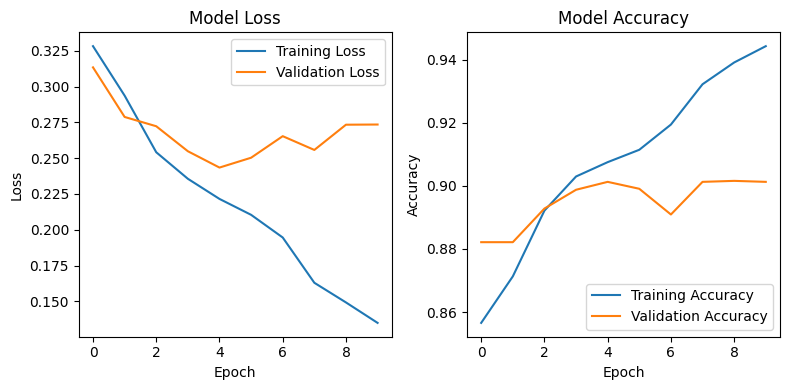

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(8, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()


In [ ]:
# Clean the testing data
test_data['clean_text'] = test_data['text'].apply(clean_text)

# Tokenize the text
test_data['tokenized_text'] = test_data['clean_text'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))

# Pad/truncate the tokenized sequences to the max length
X_test_padded = tf.keras.preprocessing.sequence.pad_sequences(test_data['tokenized_text'].tolist(), maxlen=max_len, padding='post', truncating='post')

# Convert labels to categorical format
y_test_categorical = to_categorical(test_data['label'], num_classes)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test_categorical)
print(f'Test Accuracy: {test_accuracy:.2f}')

# Make predictions on the test set
y_test_pred = model.predict(X_test_padded)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Generate and print classification report
report = classification_report(np.argmax(y_test_categorical, axis=1), y_test_pred_classes)
print('Classification Report:')
print(report)


<ipython-input-14-12dab4262dd2>:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags


125/125 [==============================] - 37s 297ms/step - loss: 0.2248 - accuracy: 0.9093
Test Accuracy: 0.91
125/125 [==============================] - 36s 290ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1100
           1       0.94      0.93      0.94      2900

    accuracy                           0.91      4000
   macro avg       0.88      0.89      0.89      4000
weighted avg       0.91      0.91      0.91      4000



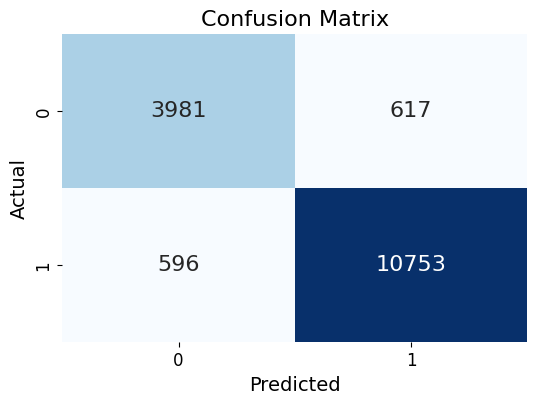

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming y_categorical and y_train_pred_classes are already defined
# Compute the confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_categorical, axis=1), y_train_pred_classes)

# Plot the confusion matrix with increased font size
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [ ]:
def preprocess_text(text, tokenizer, max_len):
    # Tokenize the text
    tokenized_text = tokenizer.encode(text, add_special_tokens=True)

    # Pad/truncate the tokenized sequence to the max length
    padded_text = tf.keras.preprocessing.sequence.pad_sequences([tokenized_text], maxlen=max_len, padding='post', truncating='post')

    return padded_text

def predict_sarcasm(text, model, tokenizer, max_len):
    # Preprocess the input text
    input_text = preprocess_text(text, tokenizer, max_len)

    # Make a prediction
    prediction = model.predict(input_text)

    # Get the class with the highest probability
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Map the predicted class to the actual label (assuming 0: not sarcastic, 1: sarcastic)
    if predicted_class == 1:
        return "Sarcastic"
    else:
        return "Not Sarcastic"

# Example usage
text = " Moroni to Anjouan. It is a very small airline. My ticket advised me to turn up at 0800hrs which I did. There was confusion at this small airport. I was then directed to the office of AB Aviation which was still closed. It opened at 0900hrs and I was told that the flight had been put back to 1300hrs and that they had tried to contact me. This could not be true as they did not have my phone number. I was with a local guide and he had not been informed either. I presume that I was bumped off. The later flight did operate but as usual, there was confusion at check-in. The flight was only 30mins and there were no further problems. Not a good airline but it is the only one for Comoros."
result = predict_sarcasm(text, model, tokenizer, max_len)
print(f'The input text is: {result}')


1/1 [==============================] - 0s 135ms/step
The input text is: Sarcastic


In [ ]:
def preprocess_text(text, tokenizer, max_len):
    # Tokenize the text
    tokenized_text = tokenizer.encode(text, add_special_tokens=True)

    # Pad/truncate the tokenized sequence to the max length
    padded_text = tf.keras.preprocessing.sequence.pad_sequences([tokenized_text], maxlen=max_len, padding='post', truncating='post')

    return padded_text

def predict_sarcasm(text, model, tokenizer, max_len):
    # Preprocess the input text
    input_text = preprocess_text(text, tokenizer, max_len)

    # Make a prediction
    prediction = model.predict(input_text)

    # Get the class with the highest probability
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Map the predicted class to the actual label (assuming 0: not sarcastic, 1: sarcastic)
    if predicted_class == 1:
        return "Sarcastic"
    else:
        return "Not Sarcastic"

# Example usage
text = "  Moroni to Moheli. Turned out to be a pretty decent airline. Online booking worked well, checkin and boarding was fine and the plane looked well maintained. Its a very short flight - just 20 minutes or so so i didn't expect much but they still managed to hand our a bottle of water and some biscuits which i though was very nice. Both flights on time."
result = predict_sarcasm(text, model, tokenizer, max_len)
print(f'The input text is: {result}')


1/1 [==============================] - 0s 111ms/step
The input text is: Not Sarcastic


In [ ]:
def preprocess_text(text, tokenizer, max_len):
    # Tokenize the text
    tokenized_text = tokenizer.encode(text, add_special_tokens=True)

    # Pad/truncate the tokenized sequence to the max length
    padded_text = tf.keras.preprocessing.sequence.pad_sequences([tokenized_text], maxlen=max_len, padding='post', truncating='post')

    return padded_text

def predict_sarcasm(text, model, tokenizer, max_len):
    # Preprocess the input text
    input_text = preprocess_text(text, tokenizer, max_len)

    # Make a prediction
    prediction = model.predict(input_text)

    # Get the class with the highest probability
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Map the predicted class to the actual label (assuming 0: not sarcastic, 1: sarcastic)
    if predicted_class == 1:
        return "Sarcastic"
    else:
        return "Not Sarcastic"

# Example usage
text = "It was my first time with ZipAir and I was a bit leery of flying so far with a budget airline, but it was an enjoyable experience. Off to a good start, the check-in was fast and efficient. I flew in Standard (economy) class with 3-3-3 seating, which was comfortable with adequate legroom. The basic fare is only for the seat, but I opted for the package to get 23 kg checked baggage, seat selection plus a meal (pre-selected from a picture menu) and still saved about $500 over the fares of established airlines. Passengers are required to show their boarding pass during flight to verify the optional upgrade. The tasty meal came in a box on a tray, with just beef and rice next to bottled water. There was no salad, dessert nor other drink, But the free Wi-Fi connected to my smart phone allowed ordering drinks and snacks later, as well as compensating for having no seatback screen. The charming cabin attendants were very safety conscious, double-checking to make sure overhead bins were closed securely. ZipAir should be commended for creating a unique budget flying experience on lengthy international flights. Some earlier negative Skytrax reviews were based on unmet pandemic regulations and refund policies, not the flights themselves, Overall, I highly recommend ZipAir as an alternative to traditional carriers whose fares have skyrocketed on the HNL-NRT route since the pandemic, Just follow the their common sense rules and enjoy the money saved."
result = predict_sarcasm(text, model, tokenizer, max_len)
print(f'The input text is: {result}')


1/1 [==============================] - 0s 80ms/step
The input text is: Not Sarcastic


In [ ]:
def preprocess_text(text, tokenizer, max_len):
    # Tokenize the text
    tokenized_text = tokenizer.encode(text, add_special_tokens=True)

    # Pad/truncate the tokenized sequence to the max length
    padded_text = tf.keras.preprocessing.sequence.pad_sequences([tokenized_text], maxlen=max_len, padding='post', truncating='post')

    return padded_text

def predict_sarcasm(text, model, tokenizer, max_len):
    # Preprocess the input text
    input_text = preprocess_text(text, tokenizer, max_len)

    # Make a prediction
    prediction = model.predict(input_text)

    # Get the class with the highest probability
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Map the predicted class to the actual label (assuming 0: not sarcastic, 1: sarcastic)
    if predicted_class == 1:
        return "Sarcastic"
    else:
        return "Not Sarcastic"

# Example usage
text = "  They lied about connection in Narita and we lost all of our money with no refund. They have no agreements with any connecting airlines to transfer you once in Narita, hence they denied boarding and did not offer a refund. Nor did they advise of such at purchase. Lost $1000 with this airline."
result = predict_sarcasm(text, model, tokenizer, max_len)
print(f'The input text is: {result}')


1/1 [==============================] - 0s 101ms/step
The input text is: Sarcastic
